# EXERCISE 4.9 (A)
# Intro to Data Visualization with Python

#### Table of Content

1. Importing Libraries 
2. Dataframe
3. Checking Dataframe
4. Creating Bar Charts
5. Creating Histograms and Scatterplots
6. Sampling Data 
7. Creating Line Charts

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Dataframe

In [2]:
path = r'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [3]:
path

'/Users/charliegehant/Dropbox/4. Career Foundry/Achievement 4 - Python Fundamentals for Data Analysts/02-2022 Instacart Basket Analysis'

In [4]:
# Importing dataframe 'orders_products_group_agg.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_group_agg.pkl'))

## 3. Checking Dataframe

In [5]:
df.shape

(32435059, 26)

In [6]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spender_flag,median_order_freq,order_freq_flag
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2539329,1,prior,1,2,8,0.0,14084,2,0,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,2539329,1,prior,1,2,8,0.0,12427,3,0,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2539329,1,prior,1,2,8,0.0,26088,4,0,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,2539329,1,prior,1,2,8,0.0,26405,5,0,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer


## 4. Creating Bar Charts

<AxesSubplot:>

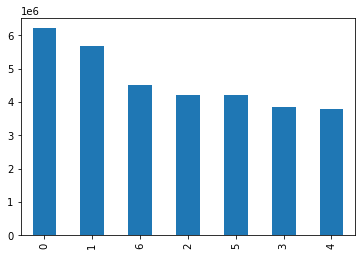

In [8]:
# create a basic bar chart, from big/max to small/min

df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

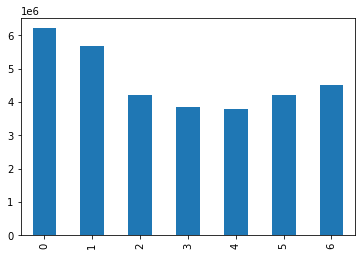

In [9]:
# create a basic bar chart, according to indexed order (0-6)

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# Same function without the visual code

df['orders_day_of_week'].value_counts(dropna = False)

0    6209808
1    5665951
6    4500391
2    4217868
5    4209603
3    3844175
4    3787263
Name: orders_day_of_week, dtype: int64

In [11]:
# Using the sort_index()function in the same way as above 

df['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    6209808
1    5665951
2    4217868
3    3844175
4    3787263
5    4209603
6    4500391
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

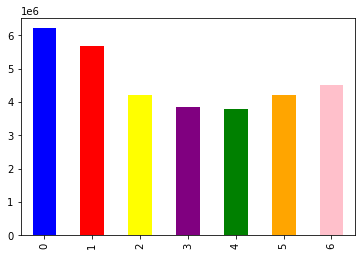

In [13]:
# Using colours in the visualisation

df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'red', 'yellow', 'purple', 'green', 'orange', 'pink'])

## 5. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

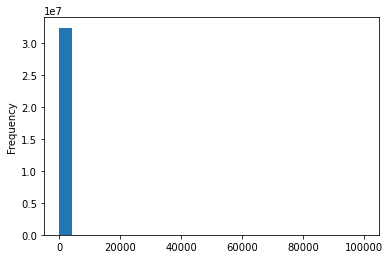

In [14]:
# Here we can see there's a problem with the histogram:

df['prices'].plot.hist(bins = 25)

In [15]:
# so we are checking what is going on with the data (next few queries)

df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
df['prices'].max()

99999.0

In [17]:
df['prices'].median()

7.4

In [18]:
df['prices'].mean()

11.980225638676366

<AxesSubplot:xlabel='prices', ylabel='prices'>

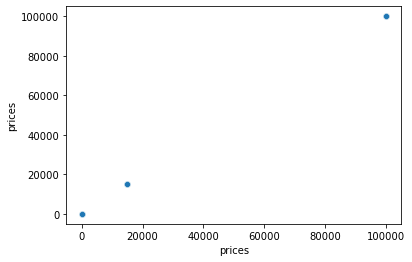

In [19]:
# on this scatter plot with can visually see the outlier(s)

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [20]:
# isolating any products priced above 100

df_check = df.loc[df['prices'] > 100]

In [21]:
# checking the head and tail, here are the culprits..

df_check[['user_id', 'prices', 'product_name']].head()

,user_id,prices,product_name
1576,17,14900.0,Lowfat 2% Milkfat Cottage Cheese
1638,17,14900.0,Lowfat 2% Milkfat Cottage Cheese
16534,135,14900.0,Lowfat 2% Milkfat Cottage Cheese
16540,135,14900.0,Lowfat 2% Milkfat Cottage Cheese
53712,342,14900.0,Lowfat 2% Milkfat Cottage Cheese


In [22]:
df_check[['user_id', 'prices', 'product_name']].tail()

,user_id,prices,product_name
32350634,205650,14900.0,Lowfat 2% Milkfat Cottage Cheese
32377867,205818,14900.0,Lowfat 2% Milkfat Cottage Cheese
32377877,205818,14900.0,Lowfat 2% Milkfat Cottage Cheese
32410707,206049,14900.0,Lowfat 2% Milkfat Cottage Cheese
32410731,206049,14900.0,Lowfat 2% Milkfat Cottage Cheese


In [23]:
# Transforming these abnormal values into NaN

df.loc[df['prices'] >100, 'prices'] = np.nan

In [24]:
# Now the outliers are gone, the max price is $25, which seems correct

df['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

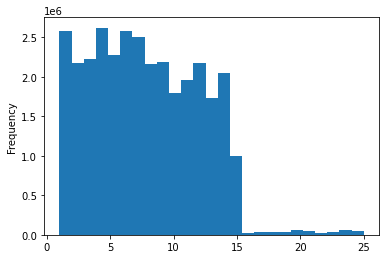

In [25]:
# re-running the histogram query: 

df['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

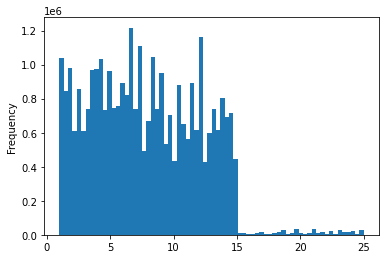

In [26]:
df['prices'].plot.hist(bins = 70)

## 6. Sampling Data 
##### (as a premilinary step of creating a line chart)

In [27]:
# Create a list holding True/False values - randomizing data into 70/30 split (0.7)

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [28]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [29]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [30]:
df.shape

(32435059, 26)

In [31]:
len(df)

32435059

In [32]:
# Checking the query

len(big)

22705099

In [33]:
len(small)

9729960

In [34]:
len(big) + len(small)

32435059

In [35]:
# Further reducing size of sample df

df_2 = small[['orders_day_of_week','prices']]

In [36]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


In [37]:
df_2.describe()

,orders_day_of_week,prices
count,9.729960e+06,9.719281e+06
mean,2.738543e+00,7.791522e+00
std,2.089969e+00,4.240544e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.200000e+00
50%,3.000000e+00,7.400000e+00
75%,5.000000e+00,1.130000e+01
max,6.000000e+00,2.500000e+01


## 7. Creating Line Charts

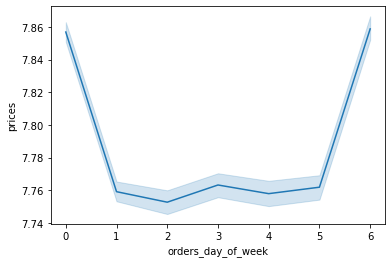

In [38]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

## 8. Exporting Charts

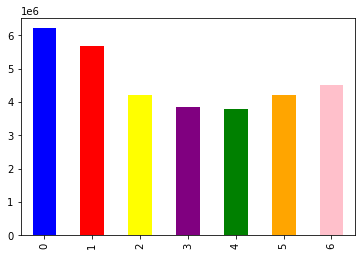

In [39]:
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'red', 'yellow', 'purple', 'green', 'orange', 'pink'])

In [40]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_colors.png'))

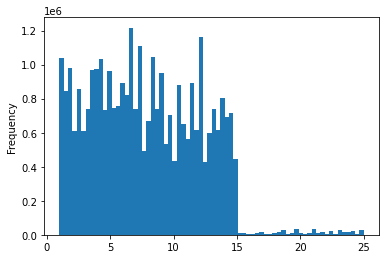

In [41]:
hist = df['prices'].plot.hist(bins = 70)

In [42]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [43]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_vs_ordersdow.png'))